In [7]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 11.6/11.6 MB 2.2 MB/s eta 0:00:00
     ------------------------------------ 345.4/345.4 kB 252.2 kB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 7.6/7.6 MB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 56.2/56.2 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 2.0 MB/s eta 0:00:00
     -------------------------------------- 103.1/103.1 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 181.9/181.9 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 2.6 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 294.9/294.9 kB 1.1 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
!pip install pymysql
!pip install warnings

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings

[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pymysql
import warnings


In [7]:
connection=pymysql.connect(host='localhost',user='root',password='Shubham@1998',database='crime_schema')

In [8]:
warnings.filterwarnings("ignore")

SPATIAL ANALYSIS

Where are the geographical hotspots for reported crimes?

In [9]:
query= 'select lon,lat from crime_analysis'
df=pd.read_sql(query,connection)

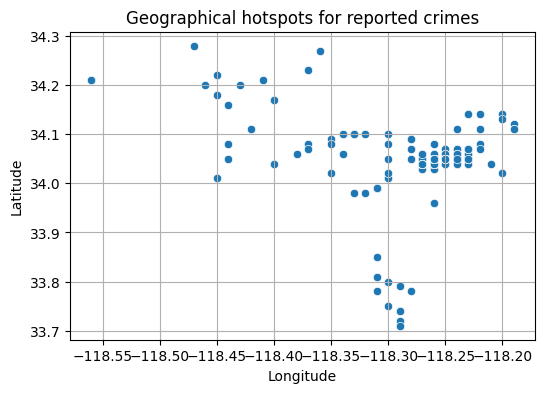

In [10]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='lon',y='lat',data=df)
plt.title('Geographical hotspots for reported crimes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

From above analysis we conclude that crime hotspot is between 34.0,118.30 and 34.1,118.20 .

VICTIM DEMOGRAPHICS

What is distribution of victim ages in reported crimes?

In [20]:
query='select Vict_Age from crime_analysis'
df=pd.read_sql(query,connection)

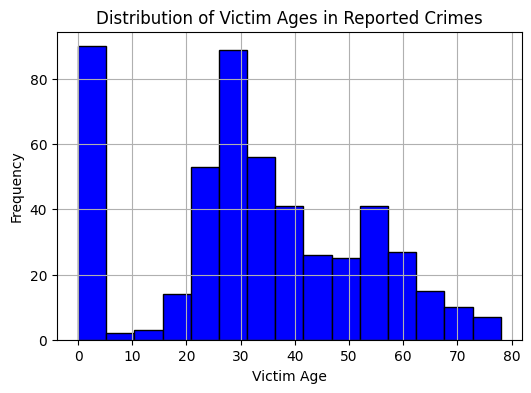

In [21]:
plt.figure(figsize=(6,4))
sns.histplot(df['Vict_Age'],bins=15,facecolor='blue')
plt.title('Distribution of Victim Ages in Reported Crimes')
plt.xlabel('Victim Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()

From our analysis we get to know that maximum victims are of age near 30 years followed by ages between 1 to 5 years. 

Is there a significant difference in crime rates between male and female victims?

In [13]:
query='select Vict_Sex from crime_analysis'
df=pd.read_sql(query,connection)

Text(0.5, 1.0, 'Distribution of Victim Gender')

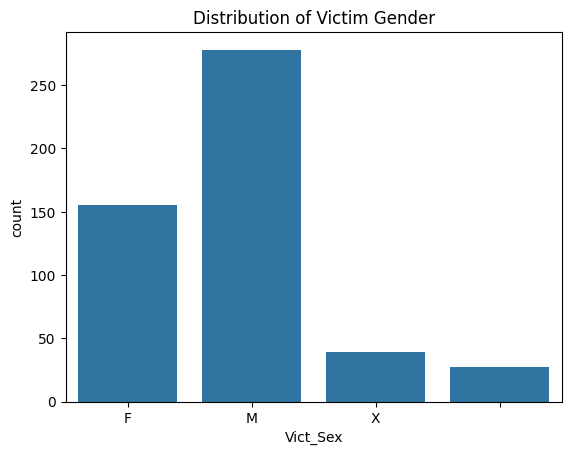

In [14]:
sns.countplot(x='Vict_Sex',data=df)
plt.title('Distribution of Victim Gender')

It is evident from the countplot that there is a difference of 100 count between male and female victim which is a significant difference.

CRIME CODE ANALYSIS

What is distribution of reported crime based or Crime Code?

In [26]:
query='select Crm_Cd from crime_analysis'
df=pd.read_sql(query,connection)

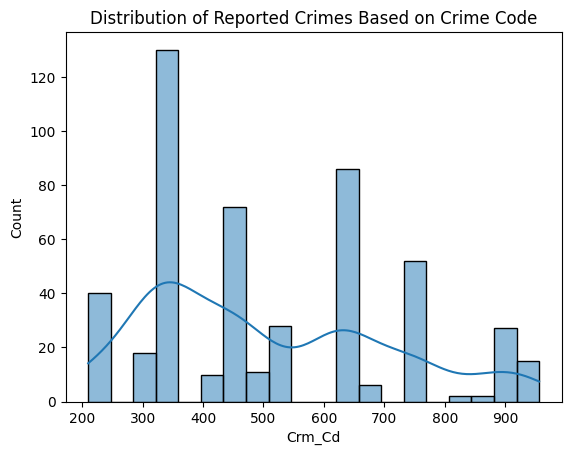

In [27]:
plt.title('Distribution of Reported Crimes Based on Crime Code')
sns.histplot(x='Crm_Cd',data=df,bins=20, kde=True)
plt.show()

LOCATION ANALYSIS

Where do most crimes occur based on the "Location" column?

In [33]:
query='select Location from crime_analysis'
df=pd.read_sql(query,connection)

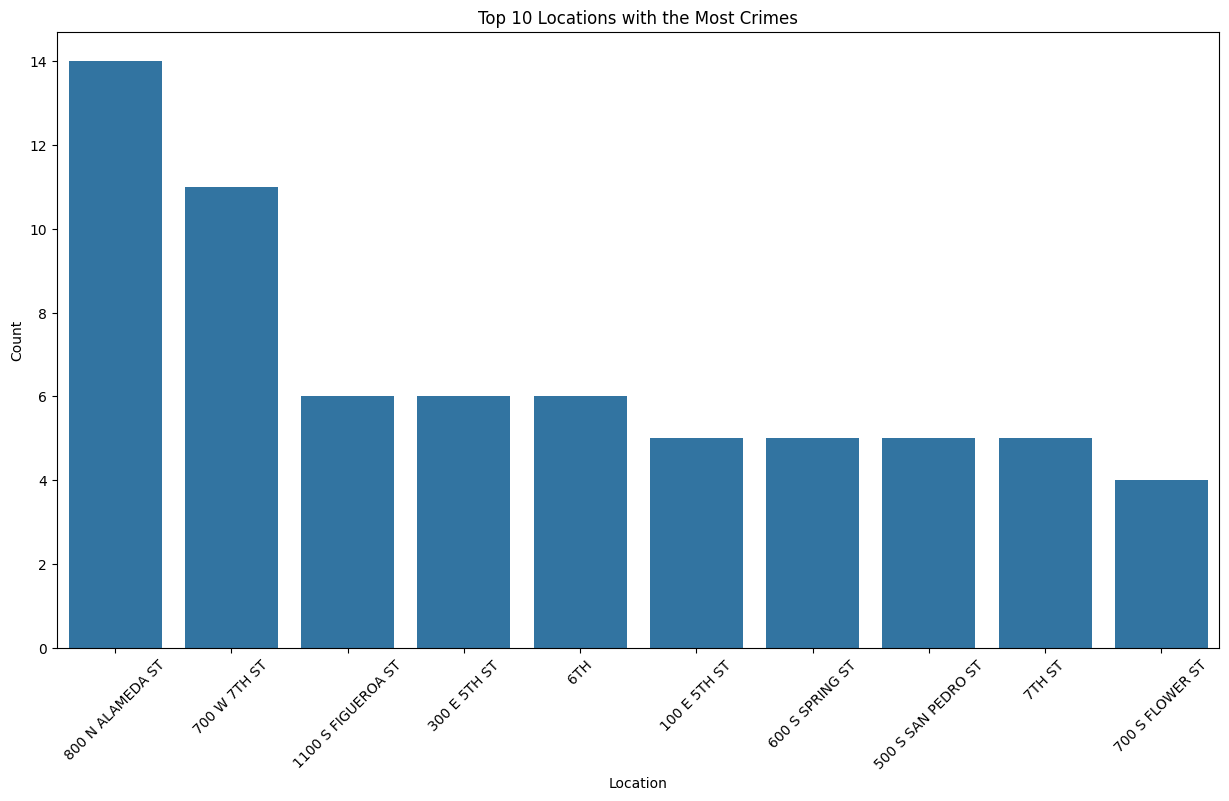

In [34]:
plt.figure(figsize=(15, 8))
sns.countplot(x='Location', data=df, order=df['Location'].value_counts().index[:10])
plt.title('Top 10 Locations with the Most Crimes')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Here we have plot for the top 10 locations with highest crime rates where 800N ALAMEDA ST have highest no. of recorded crimes followed by 700 W 7TH ST.